================================================Word Embedding (word2vec)=======================================

Word vectors are vectors used to represent words, and can also be considered as feature vectors or representations of words. The technique of mapping words to real vectors is called word embedding.

The word2vec tool contains both the skip-gram and continuous bag of words models.

The skip-gram model assumes that a word can be used to generate its surrounding words in a text sequence; while the continuous bag of words model assumes that a center word is generated based on its surrounding context words.

#### The Skip-Gram Model

##### Overview

The **Skip-Gram model** learns word representations by predicting the **surrounding context words** given **a center word** in a sentence.
The Skip-Gram model forms the basis of **Word2Vec**, producing dense word vectors that capture semantic similarity through context prediction.

Example: For the sequence *"the man loves his son"*, if we choose *"loves"* as the center word and set the context window size to 2, the model predicts: *"the"*, *"man"*, *"his"*, *"son"*.

------------------------------------------------------------------------

##### 1️⃣ Conditional Probability of Context Words

The model assumes **context words are conditionally independent** given the center word. Thus, the joint probability can be written as:

$$
P(w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2} | w_t) = \prod_{-m \le j \le m, j \ne 0} P(w_{t+j} | w_t)
$$

------------------------------------------------------------------------

##### 2️⃣ Probability Model (Softmax)

Each word is represented by two vectors:

-   $\mathbf{v}_w$: center (input) word vector
-   $\mathbf{u}_w$: context (output) word vector

The conditional probability of a context word $w_o$ given a center word $w_c$ is modeled as:

$$
P(w_o | w_c) = \frac{\exp(\mathbf{u}_{w_o}^T \mathbf{v}_{w_c})}{\sum_{w \in V} \exp(\mathbf{u}_w^T \mathbf{v}_{w_c})}
$$

where $V$ is the vocabulary.

------------------------------------------------------------------------

##### 3️⃣ Objective Function

Given a sequence of words of length $T$, and window size $m$, the Skip-Gram model maximizes the likelihood of generating all context words given their center word:

$$
\prod_{t=1}^{T} \prod_{-m \le j \le m, j \ne 0} P(w_{t+j} | w_t)
$$

Equivalently, minimize the **negative log-likelihood**:

$$
-\frac{1}{T} \sum_{t=1}^{T} \sum_{-m \le j \le m, j \ne 0} \log P(w_{t+j} | w_t)
$$

------------------------------------------------------------------------

##### 4️⃣ Training

The Skip-Gram model learns the parameters $\mathbf{v}_w$ and $\mathbf{u}_w$ for all words in the vocabulary by maximizing
the log-likelihood using **stochastic gradient descent (SGD)**.

At each step, a random subsequence of words is sampled to approximate
the gradient and update model parameters.

------------------------------------------------------------------------

##### 5️⃣ Gradient Derivation

The log probability is given by:

$$
\log P(w_o | w_c) = \mathbf{u}_{w_o}^T \mathbf{v}_{w_c} - \log \sum_{w \in V} \exp(\mathbf{u}_w^T \mathbf{v}_{w_c})
$$

Gradient with respect to the **center word vector** $\mathbf{v}_{w_c}$:

$$
\frac{\partial \log P(w_o | w_c)}{\partial \mathbf{v}_{w_c}} = \mathbf{u}_{w_o} - \sum_{w \in V} P(w | w_c)\mathbf{u}_w
$$

Gradient with respect to the **context word vector** $\mathbf{u}_{w_o}$:

$$
\frac{\partial \log P(w_o | w_c)}{\partial \mathbf{u}_{w_o}} = \mathbf{v}_{w_c} (1 - P(w_o | w_c))
$$

------------------------------------------------------------------------

##### 6️⃣ Intuition

-   Skip-Gram predicts **context words** from a **center word**.
-   The embeddings $\mathbf{v}_w$ and $\mathbf{u}_w$ are learned so that words appearing in similar contexts have
    **similar vector representations**.
-   After training:
    -   $\mathbf{v}_w$: used as **word embeddings** (center representation).
    -   $\mathbf{u}_w$: used as **context embeddings**.


#### The Continuous Bag of Words (CBOW) Model

##### 🧠 Overview

The **Continuous Bag of Words (CBOW)** model predicts the **center word** given its **surrounding context words**. This is the reverse of the Skip-Gram model, which predicts context words from a center word.

Example: For the sentence *"the man loves his son"* with center word "loves" and window size 2, the context words are: "the", "man", "his", "son". The CBOW model predicts: $P("loves" \mid "the", "man", "his", "son")$

------------------------------------------------------------------------

##### 1️⃣ Conditional Probability

Context words are assumed to be conditionally independent contributors to predicting the center word.

Each word is represented by:

-   $\mathbf{v}_w$: context (input) vector
-   $\mathbf{u}_w$: center (output) vector

CBOW **averages context vectors**:

$$
\mathbf{v}_{W_c} = \frac{1}{2m} \sum_{j=-m, j \ne 0}^{m} \mathbf{v}_{w_{t+j}}
$$

Probability of predicting center word $w_t$:

$$
P(w_t \mid W_c) = \frac{\exp(\mathbf{u}_{w_t}^ T \mathbf{v}_{W_c})}
{\sum_{w \in V} \exp(\mathbf{u}_w^  T \mathbf{v}_{W_c})}
$$

This is a softmax over all vocabulary words. $W_c$ refers to the set of context words surrounding the center word.

------------------------------------------------------------------------

##### 2️⃣ Objective Function

Given a sequence of length $T$, the CBOW likelihood is:

$$
\prod_{t=1}^{T}
P(w_t \mid w_{t-m}, \ldots, w_{t+m})
$$

Training minimizes the **negative log-likelihood**:

$$
- \sum_{t=1}^{T} \log P(w_t \mid w_{t-m}, \ldots, w_{t+m})
$$

------------------------------------------------------------------------

##### 3️⃣ Training

CBOW uses **stochastic gradient descent (SGD)**. A random subsequence of words is sampled in each iteration to estimate gradients and update parameters.

------------------------------------------------------------------------

##### 4️⃣ Gradient Derivation

Log probability:

$$
\log P(w_t \mid W_c) =
\mathbf{u}_{w_t}^ T \mathbf{v}_{W_c}
-
\log \sum_{w \in V} \exp(\mathbf{u}_{w}^ T \mathbf{v}_{W_c})
$$

Gradient w.r.t. each context vector $\mathbf{v}_{w_i}$:

$$
\frac{\partial \log P(w_t \mid W_c)}{\partial \mathbf{v}_{w_i}}
=
\frac{1}{2m}
\left[
\mathbf{u}_{w_t}
-
\sum_{w \in V} P(w \mid W_c)\mathbf{u}_w
\right]
$$

------------------------------------------------------------------------

##### ✅ Key Takeaways

-   CBOW predicts **one center word** from **multiple context words**.
-   It **averages** context vectors → computationally efficient.
-   Learned embeddings capture semantic similarity.
-   Forms half of the foundational **Word2Vec** framework (with Skip-Gram).

------------------------------------------------------------------------


Due to the nature of the softmax operation, since a context word may be anyone in the dictionary, the opposite of avove algorithm contains the summation of items as many as the entire size of the vocabulary. Consequently, the gradient calculation for the skip-gram model and that for the continuous bag-of-words model both contain the summation. Unfortunately, the computational cost for such gradients that sum over a large dictionary (often with hundreds of thousands or millions of words) is huge!
In order to reduce the computational complexity, this section will introduce two approximate training methods: **negative sampling** and **hierarchical softmax**. 

#### Negative Sampling

##### 🧠 Overview

The original Skip-Gram objective uses a full softmax over the entire vocabulary $∣𝑉∣$, which is computationally expensive because it requires updating gradients for all words.

Instead of updating **all word vectors**, it updates only: - the **positive example** (true context word)\- **K negative samples** (noise words). This makes training fast and scalable.

------------------------------------------------------------------------

##### 1️⃣ Positive Example Probability

Given a center word $w_c$ and true context word $w_o$:

$$
P(D = 1 \mid w_c, w_o) = \sigma(\mathbf{u}_{w_o}^ T \mathbf{v}_{w_c})
$$

Sigmoid:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

------------------------------------------------------------------------

##### 2️⃣ Why Negative Sampling?

The original Skip-Gram objective considers only **positive examples**, which leads to:
- $\prod_{t=1}^{T} \prod_{-m<=j<=m, j \ne 0}P(D = 1 \mid w^{(t)}, w^{(t+j)})$ Only maximizes when all word vectors grow to infinity → meaningless maximization (vectors blow up to infinity) 
- extremely expensive softmax (needs $|V|$ updates)

Negative sampling fixes both.

------------------------------------------------------------------------

##### 3️⃣ How Negative Sampling Works

For each positive pair ($w_c$, $w_o$):
- Draw **K negative samples** $w_k$ from noise distribution $P(w)$
- Treat them as "fake context words" with label $D=0$

The new objective approximation:

$$
P(w_o \mid w_c) \approx 
P(D = 1 \mid w_c, w_o)
\prod_{k=1}^{K} P(D = 0 \mid w_c, w_k)
$$

------------------------------------------------------------------------

##### 4️⃣ Loss Function

Let $i$ = index of center word, $h$ = index of true context word:

$$
-\log \sigma(\mathbf{u}_{h}^ T \mathbf{v}_{i})
-
\sum_{k=1}^{K} \log(1 - \sigma(\mathbf{u}_{k}^ T \mathbf{v}_{i}))
$$

Equivalent form:

$$
-\log \sigma(\mathbf{u}_{h}^ T \mathbf{v}_{i})
+
\sum_{k=1}^{K} \log \sigma(-\mathbf{u}_{k}^ T \mathbf{v}_{i})
$$

**Meaning:** 
- Positive pair → push dot product higher
- Negative pairs → push dot products lower

------------------------------------------------------------------------

##### 5️⃣ Computational Efficiency

With negative sampling: - Computation depends only on **K**, not vocabulary size
- Typical K = 5 to 20
- Enables training on large corpora quickly

Negative sampling reduces training to a scalable binary classification problem.


#### Hierarchical Softmax

##### 🧠 Overview

Hierarchical softmax is an efficient alternative to the traditional softmax used in Word2Vec. Instead of computing probabilities over the entire vocabulary $|V|$,
it organizes all words into a **binary tree**, where each **leaf node** corresponds to a word.

Predicting a word becomes making a sequence of **binary decisions** along the path from the root to that word's leaf node.

This reduces computational cost from:

$$
O(|V|) \quad \rightarrow \quad O(\log |V|)
$$

------------------------------------------------------------------------

##### 1️⃣ Tree Structure

-   Each word $w$ is represented as a **leaf node**.
-   There is a unique path from the **root** to each leaf.
-   The number of nodes on this path is $L(w)$.
-   Let $n(w, j)$ denote the $j$-th node on the path.
-   Each internal node has a vector $\mathbf{u}_{n(w, j)}$.

A node can have a **left** or **right** child, and each decision is a binary classification.

![Hierarchical softmax](./Images/hierarchicalSoftmax.png)

------------------------------------------------------------------------

##### 2️⃣ Probability of a Word

Hierarchical softmax computes the probability of generating word $w_o$ given center word $w_c$ as:

$$
P(w_o \mid w_c)
=
\prod_{j = 1}^{L(w_o)-1}
\sigma\left(
\big[ n(w_o, j+1) = \text{leftChild}(n(w_o, j)) \big]
\cdot
\mathbf{u}_{n(w_o, j)}^\top \mathbf{v}_{w_c}
\right)
$$

Where:
-   The bracket equals **+1** if the next node is the left child
-   Equals **-1** if the next node is the right child

So the model learns to output a correct sequence of binary choices leading to the target word’s leaf.

------------------------------------------------------------------------

##### 3️⃣ Example

For word $w_3$, suppose the path is:

-   root → left → right → leaf

Probability becomes:

$$
P(w_3 \mid w_c)
=
\sigma(\mathbf{u}_{n_1}^T \mathbf{v}_{w_c})
\cdot
\sigma(-\mathbf{u}_{n_2}^T \mathbf{v}_{w_c})
\cdot
\sigma(\mathbf{u}_{n_3}^T \mathbf{v}_{w_c})
$$

------------------------------------------------------------------------

##### 4️⃣ Valid Probability Distribution

Hierarchical softmax ensures that:

$$
\sum_{w \in V} P(w \mid w_c) = 1
$$

even though it bypasses the full softmax.

------------------------------------------------------------------------

##### ✅ Key Takeaways

-   Converts predicting a word into making $\log |V|$ binary decisions.
-   Efficient for large vocabularies.
-   Widely used in Word2Vec models.
-   Provides a scalable alternative to full softmax.

------------------------------------------------------------------------


================================================The Dataset for Pretraining Word Embeddings=======================================

In [2]:
import collections
import math
import os
import random
import torch
from d2l import torch as d2l

In [3]:
#@save
d2l.DATA_HUB['ptb'] = (d2l.DATA_URL + 'ptb.zip','319d85e578af0cdc590547f26231e4e31cdf1e42')

#@save
def read_ptb():
    """Load the PTB dataset into a list of text lines."""
    data_dir = d2l.download_extract('ptb')
    # Read the training set
    with open(os.path.join(data_dir, 'ptb.train.txt')) as f:
        raw_text = f.read()
    return [line.split() for line in raw_text.split('\n')]

sentences = read_ptb()
f'# sentences: {len(sentences)}'

'# sentences: 42069'

In [4]:
vocab = d2l.Vocab(sentences, min_freq=10)
f'vocab size: {len(vocab)}'

'vocab size: 6719'

In [6]:
#@save
def subsample(sentences, vocab):
    """Subsample high-frequency words."""
    # Exclude unknown tokens ('<unk>')
    sentences = [[token for token in line if vocab[token] != vocab.unk] for line in sentences]
    counter = collections.Counter([token for line in sentences for token in line])
    num_tokens = sum(counter.values())

    # Return True if `token` is kept during subsampling
    def keep(token):
        return(random.uniform(0, 1) <
               math.sqrt(1e-4 / counter[token] * num_tokens))

    return ([[token for token in line if keep(token)] for line in sentences],
            counter)

subsampled, counter = subsample(sentences, vocab)

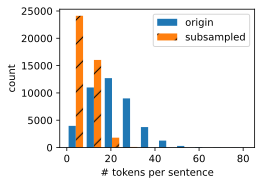

In [7]:
d2l.show_list_len_pair_hist(['origin', 'subsampled'], '# tokens per sentence',
                            'count', sentences, subsampled);

In [8]:
def compare_counts(token):
    return (f'# of "{token}": '
            f'before={sum([l.count(token) for l in sentences])}, '
            f'after={sum([l.count(token) for l in subsampled])}')

compare_counts('the')

'# of "the": before=50770, after=2020'

In [9]:
compare_counts('join')

'# of "join": before=45, after=45'

In [10]:
corpus = [vocab[line] for line in subsampled]
corpus[:3]

[[], [6697, 4127, 3228, 416, 1773, 27], [993, 3922, 1922, 4743]]

In [11]:
#@save
def get_centers_and_contexts(corpus, max_window_size):
    """Return center words and context words in skip-gram."""
    centers, contexts = [], []
    for line in corpus:
        # To form a "center word--context word" pair, each sentence needs to
        # have at least 2 words
        if len(line) < 2:
            continue
        centers += line
        for i in range(len(line)):  # Context window centered at `i`
            window_size = random.randint(1, max_window_size)
            indices = list(range(max(0, i - window_size),
                                 min(len(line), i + 1 + window_size)))
            # Exclude the center word from the context words
            indices.remove(i)
            contexts.append([line[idx] for idx in indices])
    return centers, contexts

In [14]:
tiny_dataset = [list(range(7)), list(range(7, 10))]
print('dataset', tiny_dataset)
for center, context in zip(*get_centers_and_contexts(tiny_dataset, 2)):
    print('center', center, 'has contexts', context)

dataset [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]
center 0 has contexts [1]
center 1 has contexts [0, 2, 3]
center 2 has contexts [1, 3]
center 3 has contexts [1, 2, 4, 5]
center 4 has contexts [3, 5]
center 5 has contexts [3, 4, 6]
center 6 has contexts [4, 5]
center 7 has contexts [8, 9]
center 8 has contexts [7, 9]
center 9 has contexts [8]


In [15]:
all_centers, all_contexts = get_centers_and_contexts(corpus, 5)
f'# center-context pairs: {sum([len(contexts) for contexts in all_contexts])}'

'# center-context pairs: 1501304'

In [29]:
# negative sampling

#@save
class RandomGenerator:
    """Randomly draw among {1, ..., n} according to n sampling weights."""
    def __init__(self, sampling_weights):
        # Exclude
        self.population = list(range(1, len(sampling_weights) + 1))
        self.sampling_weights = sampling_weights
        self.candidates = []
        self.i = 0

    def draw(self):
        if self.i == len(self.candidates):
            # Cache `k` random sampling results
            self.candidates = random.choices(self.population, self.sampling_weights, k=10000) # sample 10000 at a time
            # print(self.candidates)
            self.i = 0
        self.i += 1
        return self.candidates[self.i - 1]

In [30]:
generator = RandomGenerator([2, 3, 4])
[generator.draw() for _ in range(10)]

[1, 3, 3, 2, 2, 3, 2, 1, 1, 2]

In [ ]:
# For a pair of center word and context word, we randomly sample K (5 in the experiment) noise words. 
# In the word2vec paper, the sampling probability P(w) of a noise word is set to its relative frequency in the dictionary raised to the power of 0.75

#@save
def get_negatives(all_contexts, vocab, counter, K):
    """Return noise words in negative sampling."""
    # Sampling weights for words with indices 1, 2, ... (index 0 is the
    # excluded unknown token) in the vocabulary
    sampling_weights = [counter[vocab.to_tokens(i)]**0.75 for i in range(1, len(vocab))]
    all_negatives, generator = [], RandomGenerator(sampling_weights)
    for contexts in all_contexts:
        negatives = []
        while len(negatives) < len(contexts) * K:
            neg = generator.draw()
            # Noise words cannot be context words
            if neg not in contexts:
                negatives.append(neg)
        all_negatives.append(negatives)
    return all_negatives

all_negatives = get_negatives(all_contexts, vocab, counter, 5)

In [32]:
#@save
def batchify(data):
    """Return a minibatch of examples for skip-gram with negative sampling."""
    max_len = max(len(c) + len(n) for _, c, n in data)
    centers, contexts_negatives, masks, labels = [], [], [], []
    for center, context, negative in data:
        cur_len = len(context) + len(negative)
        centers += [center]
        contexts_negatives += [context + negative + [0] * (max_len - cur_len)]
        masks += [[1] * cur_len + [0] * (max_len - cur_len)]
        labels += [[1] * len(context) + [0] * (max_len - len(context))]
    return (torch.tensor(centers).reshape((-1, 1)), torch.tensor(
        contexts_negatives), torch.tensor(masks), torch.tensor(labels))

In [33]:
x_1 = (1, [2, 2], [3, 3, 3, 3])
x_2 = (1, [2, 2, 2], [3, 3])
batch = batchify((x_1, x_2))

names = ['centers', 'contexts_negatives', 'masks', 'labels']
for name, data in zip(names, batch):
    print(name, '=', data)

centers = tensor([[1],
        [1]])
contexts_negatives = tensor([[2, 2, 3, 3, 3, 3],
        [2, 2, 2, 3, 3, 0]])
masks = tensor([[1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0]])
labels = tensor([[1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0]])


In [36]:
#@save
def load_data_ptb(batch_size, max_window_size, num_noise_words):
    """Download the PTB dataset and then load it into memory."""
    num_workers = d2l.get_dataloader_workers()
    sentences = read_ptb()
    vocab = d2l.Vocab(sentences, min_freq=10)
    subsampled, counter = subsample(sentences, vocab)
    corpus = [vocab[line] for line in subsampled]
    all_centers, all_contexts = get_centers_and_contexts(
        corpus, max_window_size)
    all_negatives = get_negatives(
        all_contexts, vocab, counter, num_noise_words)

    class PTBDataset(torch.utils.data.Dataset):
        def __init__(self, centers, contexts, negatives):
            assert len(centers) == len(contexts) == len(negatives)
            self.centers = centers
            self.contexts = contexts
            self.negatives = negatives

        def __getitem__(self, index):
            return (self.centers[index], self.contexts[index],
                    self.negatives[index])

        def __len__(self):
            return len(self.centers)

    dataset = PTBDataset(all_centers, all_contexts, all_negatives)

    data_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True,
                                      collate_fn=batchify,
                                      num_workers=num_workers)
    return data_iter, vocab

In [47]:
data_iter, vocab = load_data_ptb(512, 5, 5)
for batch in data_iter:
    for name, data in zip(names, batch):
        print(name, 'shape:', data.shape)
    break

AttributeError: Can't pickle local object 'load_data_ptb.<locals>.PTBDataset'

======================================Pretraining word2vec=============================================

In [39]:
import math
import torch
from torch import nn
from d2l import torch as d2l

batch_size, max_window_size, num_noise_words = 512, 5, 5
data_iter, vocab = d2l.load_data_ptb(batch_size, max_window_size, num_noise_words)

In [40]:
embed = nn.Embedding(num_embeddings=20, embedding_dim=4) # (vocab_size, embed_size)
print(f'Parameter embedding_weight ({embed.weight.shape}, '
      f'dtype={embed.weight.dtype})')

Parameter embedding_weight (torch.Size([20, 4]), dtype=torch.float32)


In [41]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]]) # (2, 3) -> (2, 3, 4)
embed(x)

tensor([[[-1.3018,  0.4162,  1.1194, -1.7517],
         [ 0.2721, -2.0752, -1.4533,  0.1977],
         [ 0.5588, -1.5292,  1.1404,  0.8593]],

        [[ 0.6746, -0.9776, -0.0680,  0.6839],
         [ 0.9648, -0.6881,  1.8089,  0.4572],
         [ 0.5193,  0.3009, -0.1725,  0.5405]]], grad_fn=<EmbeddingBackward0>)

In [ ]:
def skip_gram(center, contexts_and_negatives, embed_v, embed_u):
    # center: (batch size, 1)
    # contexts_and_negatives: (batch size, max_len)
    v = embed_v(center) # (batch size, 1, embed_size)
    u = embed_u(contexts_and_negatives) # (batch size, max_len, embed_size)
    pred = torch.bmm(v, u.permute(0, 2, 1)) # (batch size, 1, max_len)
    return pred

In [43]:
skip_gram(torch.ones((2, 1), dtype=torch.long),
          torch.ones((2, 4), dtype=torch.long), embed, embed).shape

torch.Size([2, 1, 4])

In [ ]:
class SigmoidBCELoss(nn.Module):
    # Binary cross-entropy loss with masking
    def __init__(self):
        super().__init__()

    def forward(self, inputs, target, mask=None):
        out = nn.functional.binary_cross_entropy_with_logits(inputs, target, weight=mask, reduction="none")
        return out.mean(dim=1)

loss = SigmoidBCELoss()

In [45]:
pred = torch.tensor([[1.1, -2.2, 3.3, -4.4]] * 2)
label = torch.tensor([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])
mask = torch.tensor([[1, 1, 1, 1], [1, 1, 0, 0]])
loss(pred, label, mask) * mask.shape[1] / mask.sum(axis=1)

tensor([0.9352, 1.8462])

In [46]:
def sigmd(x):
    return -math.log(1 / (1 + math.exp(-x)))

print(f'{(sigmd(1.1) + sigmd(2.2) + sigmd(-3.3) + sigmd(4.4)) / 4:.4f}')
print(f'{(sigmd(-1.1) + sigmd(-2.2)) / 2:.4f}')

0.9352
1.8462


In [ ]:
# define two embedding layers for all the words in the vocabulary when they are used as center words and context words, respectively. 

embed_size = 100
net = nn.Sequential(nn.Embedding(num_embeddings=len(vocab),
                                 embedding_dim=embed_size),
                    nn.Embedding(num_embeddings=len(vocab),
                                 embedding_dim=embed_size))

In [49]:
def train(net, data_iter, lr, num_epochs, device=d2l.try_gpu()):
    def init_weights(module):
        if type(module) == nn.Embedding:
            nn.init.xavier_uniform_(module.weight)
    net.apply(init_weights)
    net = net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs])
    # Sum of normalized losses, no. of normalized losses
    metric = d2l.Accumulator(2)
    for epoch in range(num_epochs):
        timer, num_batches = d2l.Timer(), len(data_iter)
        for i, batch in enumerate(data_iter):
            optimizer.zero_grad()
            center, context_negative, mask, label = [
                data.to(device) for data in batch]

            pred = skip_gram(center, context_negative, net[0], net[1])
            l = (loss(pred.reshape(label.shape).float(), label.float(), mask)
                     / mask.sum(axis=1) * mask.shape[1])
            l.sum().backward()
            optimizer.step()
            metric.add(l.sum(), l.numel())
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[1],))
    print(f'loss {metric[0] / metric[1]:.3f}, '
          f'{metric[1] / timer.stop():.1f} tokens/sec on {str(device)}')

AttributeError: Can't pickle local object 'load_data_ptb.<locals>.PTBDataset'

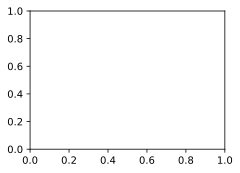

In [50]:
lr, num_epochs = 0.002, 5
train(net, data_iter, lr, num_epochs)

In [ ]:
def get_similar_tokens(query_token, k, embed):
    W = embed.weight.data
    x = W[vocab[query_token]]
    # Compute the cosine similarity. Add 1e-9 for numerical stability
    # torch.mv: matrix-vector product
    cos = torch.mv(W, x) / torch.sqrt(torch.sum(W * W, dim=1) *
                                      torch.sum(x * x) + 1e-9)
    topk = torch.topk(cos, k=k+1)[1].cpu().numpy().astype('int32')
    for i in topk[1:]:  # Remove the input words
        print(f'cosine sim={float(cos[i]):.3f}: {vocab.to_tokens(i)}')

get_similar_tokens('chip', 3, net[0])

=====================Word Embedding with Global Vectors (GloVe)=========================

#### Skip-Gram with Global Corpus Statistics (SG-GCS)

##### Overview
- Defines $q_{ij} = P(w_j | w_i)$ as the conditional probability of context word $w_j$ given center word $w_i$.  
- Computed as:  
  $$ q_{ij} = \frac{\exp(u_j \cdot v_i)}{\sum_k \exp(u_k \cdot v_i)} $$

##### Key Idea
- The model uses **global co-occurrence counts** instead of local context windows.  
- For each center word $w_i$, its context words $w_j$ have multiplicities $x_{ij}$, representing the number of times $w_j$ appears in the context of $w_i$.  
- The skip-gram objective becomes: $ J = - \sum_i \sum_j x_{ij} \log q_{ij} $
- This is equivalent to:
  $J = - \sum_i x_i \sum_j p_{ij} \log q_{ij}$, where $p_{ij}$ is the conditional probability $x_{ij}/x_i$

##### Interpretation
- $\sum_j p_{ij} \log q_{ij}$ is the **cross-entropy** between the empirical distribution (from corpus statistics) and the model distribution. It is also weighted by $x_i$.
- Minimizing this loss aligns the predicted distribution $q_{ij}$ with corpus co-occurrence data $p_{ij}$.  
- Disadvantages:
  - Computing softmax over all words is very expensive
  - Rare words may dominate the loss / a large number of rare events from a large corpus are often modeled by the cross-entropy loss to be assigned with too much weight ？？？
    - The loss sums over all observed (w, c) pairs. And many rare words (“xenolith”, “pterygium”) that appear only once or twice.
	 - A rare event’s probability $\hat{p}(c|w)$ is often very small, so $-\log(\hat{p}(c|w))$ becomes very large.
	 - Therefore, even though the event is rare, it can produce a large gradient update.
	 - When the corpus is huge, you accumulate many such rare pairs → instability or skewed embeddings.


---

#### The GloVe Model

##### Motivation
The **GloVe (Global Vectors)** model modifies the skip-gram approach by using a **squared loss** and directly modeling the **ratios of co-occurrence probabilities**.

##### Main Changes
1. Replace probabilities with raw co-occurrence counts:  
   $$ f_{ij} = x_{ij}, \quad \hat{f}_{ij} = \exp(u_j \cdot v_i) $$

2. Use a **squared loss function** instead of cross-entropy:  
   $$ J = (u_j \cdot v_i + b_i + c_j - \log x_{ij})^2 $$

3. Introduce a **weighting function** to control the influence of frequent/rare pairs:  
   $$ h(x_{ij}) =
   \begin{cases}
   (x_{ij}/a)^\alpha, & \text{if } x_{ij} < a \\
   1, & \text{otherwise}
   \end{cases} $$

   Typical values: $a = 100$, $\alpha = 0.75$.

##### Final GloVe Loss Function
$$ J = \sum_{i,j} h(x_{ij}) (u_j \cdot v_i + b_i + c_j - \log x_{ij})^2 $$

##### Intuition
- GloVe learns embeddings where vector differences capture **meaningful relationships** between words.  
- The weighting function keeps the model numerically stable by preventing overemphasis on very frequent or very rare co-occurrences.  
- Training is symmetric — swapping $(w_i, w_j)$ gives comparable embeddings.

#### Interpreting GloVe from the Ratio of Co-occurrence Probabilities

##### Core Concept
Let $p_{ij} = P(w_j | w_i)$ be the conditional probability of word $w_j$ occurring in the context of $w_i$.  
The **ratio** $p_{ij} / p_{ik}$ reflects how words relate to each other.

##### Example
| Context Word | solid | gas | water | fashion |
|---------------|-------|-----|--------|----------|
| $p1 = P(w_j \mid ice)$ | 0.00019 | 0.000066 | 0.003 | 0.000017 |
| $p2 = P(w_j \mid steam)$ | 0.000022 | 0.00078 | 0.0022 | 0.000018 |
| Ratio ($p_1/p_2$) | 8.9 | 0.085 | 1.36 | 0.96 |

Observations:
- Words like **solid** relate more to *ice* → high ratio (8.9).  
- Words like **gas** relate more to *steam* → low ratio (0.085).  
- Words like **water** relate to both → ratio ≈ 1.  
- Unrelated words like **fashion** → ratio near 1 but meaningless.

##### Mathematical View
We want a function $f$ that can model this ratio: $f(w_i, w_j, w_k) \approx \frac{P_{ij}}{P_{ik}}$

A natural exponential form that depends on vector differences: $f(w_i, w_j, w_k) = \frac{\exp(u_i^\top v_j)}{\exp(u_i^\top v_k)} = \exp\!\big((v_j - v_k)^\top u_i\big)$

Equating both sides gives: $\exp\!\big((v_j - v_k)^\top u_i\big) \approx \frac{P_{ij}}{P_{ik}}$

Taking the log on both sides yields: $(v_j - v_k)^\top u_i = \log P_{ij} - \log P_{ik}$

This implies that each dot product $u_i^\top v_j$ should correspond (up to bias) to the **log of the co-occurrence probability**: $u_i^\top v_j + b_i + c_j \approx \log P_{ij}$

Since $P_{ij} = \frac{x_{ij}}{x_i}$, the normalization term $\log x_i$ can be absorbed into the bias $b_i$, giving: $u_i^\top v_j + b_i + c_j \approx \log x_{ij}$

To learn embeddings that satisfy this relation across all word pairs, we minimize a **weighted least-squares loss**:

$J = \sum_{i,j} f(x_{ij}) \, (u_i^\top v_j + b_i + c_j - \log x_{ij})^2$

where the weighting function $f(x)$ limits the influence of very frequent or rare pairs, typically:

$$
f(x) =
\begin{cases}
(x / x_{\text{max}})^\alpha, & x < x_{\text{max}} \\
1, & x \ge x_{\text{max}}
\end{cases}
$$

Common values: $x_{\text{max}} = 100$, $\alpha = 0.75$

##### Intuition
- It models **semantic relationships** directly through **ratios of co-occurrence probabilities**, making it interpretable and mathematically grounded.
- GloVe learns embeddings so that vector differences reflect **log co-occurrence ratios**, e.g.
$\text{vector}(\text{king}) - \text{vector}(\text{man}) + \text{vector}(\text{woman}) \approx \text{vector}(\text{queen})$,
$\text{vector}(\text{ice}) - \text{vector}(\text{steam}) + \text{vector}(\text{solid}) \approx \text{vector}(\text{gas})$
- **Why log ratios?** Logarithms linearize multiplicative relationships and stabilize large differences in probabilities.
- **Why GloVe > SG-GCS:**  
  - Weighted and smooth loss (robust to rare counts)  
  - No costly global softmax normalization  
  - Captures semantic regularities directly through statistics  
  - Works directly from co-occurrence matrix → faster and more interpretable

=========================================Subword Embedding=======================================

#### The fastText Model

##### Key Idea
- In **word2vec**, each *word* has a single vector.
- In **fastText**, each *word* is represented by the **sum of its subword vectors** (character n-grams).

This allows the model to capture **morphological information** (prefixes, suffixes, roots) and to represent **rare or unseen words** more effectively.

##### How Subwords Are Built
1. Add special boundary symbols `<` and `>` around the word to mark start and end.  
   Example: `"where"` → `"<where>"`.
2. Extract all character n-grams (substrings) of lengths between 3 and 6: “whe”, “her”, “ere”, “wher”, “here”, “<wh”, “re>”, “”, …
3. Each of these subwords gets its own embedding vector.

##### Word Representation
If a word $w$ has subwords $g \in G_w$, the word vector is: $v_w = \sum_{g \in G_w} z_g$, where $z_g$ is the embedding vector for subword $g$.
So the meaning of a word = **sum of its subword embeddings**.

##### Advantages
- **Handles rare words** and **out-of-vocabulary (OOV)** words:  
If a word wasn’t seen before, its subwords likely were.
- **Shares parameters** between related words:  
e.g., *running*, *runner*, *runs* share many subwords → better generalization.
- **Drawback:** More parameters and computation — you must sum all subword vectors for every word.

#### Byte Pair Encoding (BPE)

##### Motivation
FastText fixes subword length (e.g., 3–6 characters).  
To allow *variable-length subwords* and a *controlled vocabulary size*, **Byte Pair Encoding (BPE)** is used.

##### How BPE Works
1. **Start** with all characters as basic symbols (e.g., `'a', 'b', ..., 'z', '_', [UNK]`).
2. **Count frequencies** of all symbol pairs (like `'t'` + `'h'` → `'th'`).
3. **Merge the most frequent pair** into a new symbol.
4. **Repeat** until you reach a target vocabulary size.

The result is a vocabulary of subwords that frequently appear together, efficiently capturing both characters and common morphemes.

##### Example (simplified)
Initial symbols: `["l", "o", "w", "e", "r"]`

Frequent pairs:
- merge `("l", "o")` → `"lo"`
- merge `("lo", "w")` → `"low"`

Final tokens may include `"low"`, `"er"`, `"low_er"` etc.

##### Why BPE Matters
- Produces a **compact, data-driven subword vocabulary**.  
- Handles both **rare words** and **morphologically rich languages**.
- Used in **modern NLP models** (e.g., GPT-2, RoBERTa) to segment text into efficient subword units.

#### Insight
Both **fastText** and **BPE** are subword-based solutions to the same problem:  
> How to represent words that are rare, unseen, or morphologically complex.

- **fastText**: Summation of character n-gram vectors → captures morphology in embeddings.  
- **BPE**: Learns optimal subword units via data compression → efficient tokenization for large-scale NLP models.

#### Intuitive Comparison

| Feature | fastText | BPE |
|----------|-----------|-----|
| Subword type | Fixed-length character n-grams | Variable-length learned units |
| Handles OOV words | Yes | Yes |
| Vocabulary size | Larger, unbounded | Controlled, predefined |
| Used in | Classical word embeddings | Modern Transformer tokenization |

In [51]:
import collections

symbols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
           '_', '[UNK]']

In [52]:
raw_token_freqs = {'fast_': 4, 'faster_': 3, 'tall_': 5, 'taller_': 4}
token_freqs = {}
for token, freq in raw_token_freqs.items():
    token_freqs[' '.join(list(token))] = raw_token_freqs[token]
token_freqs

{'f a s t _': 4, 'f a s t e r _': 3, 't a l l _': 5, 't a l l e r _': 4}

In [54]:
def get_max_freq_pair(token_freqs):
    print("token_freqs passed down from get_max_freq_pair: ", token_freqs)
    pairs = collections.defaultdict(int)
    for token, freq in token_freqs.items():
        symbols = token.split()
        for i in range(len(symbols) - 1):
            # Key of `pairs` is a tuple of two consecutive symbols
            pairs[symbols[i], symbols[i + 1]] += freq
    return max(pairs, key=pairs.get)  # Key of `pairs` with the max value

In [55]:
def merge_symbols(max_freq_pair, token_freqs, symbols):
    symbols.append(''.join(max_freq_pair))
    new_token_freqs = dict()
    for token, freq in token_freqs.items():
        new_token = token.replace(' '.join(max_freq_pair),
                                  ''.join(max_freq_pair))
        new_token_freqs[new_token] = token_freqs[token]
    return new_token_freqs

In [56]:
num_merges = 10
for i in range(num_merges):
    max_freq_pair = get_max_freq_pair(token_freqs)
    token_freqs = merge_symbols(max_freq_pair, token_freqs, symbols)
    print(f'merge #{i + 1}:', max_freq_pair)

token_freqs passed down from get_max_freq_pair:  {'f a s t _': 4, 'f a s t e r _': 3, 't a l l _': 5, 't a l l e r _': 4}
merge #1: ('t', 'a')
token_freqs passed down from get_max_freq_pair:  {'f a s t _': 4, 'f a s t e r _': 3, 'ta l l _': 5, 'ta l l e r _': 4}
merge #2: ('ta', 'l')
token_freqs passed down from get_max_freq_pair:  {'f a s t _': 4, 'f a s t e r _': 3, 'tal l _': 5, 'tal l e r _': 4}
merge #3: ('tal', 'l')
token_freqs passed down from get_max_freq_pair:  {'f a s t _': 4, 'f a s t e r _': 3, 'tall _': 5, 'tall e r _': 4}
merge #4: ('f', 'a')
token_freqs passed down from get_max_freq_pair:  {'fa s t _': 4, 'fa s t e r _': 3, 'tall _': 5, 'tall e r _': 4}
merge #5: ('fa', 's')
token_freqs passed down from get_max_freq_pair:  {'fas t _': 4, 'fas t e r _': 3, 'tall _': 5, 'tall e r _': 4}
merge #6: ('fas', 't')
token_freqs passed down from get_max_freq_pair:  {'fast _': 4, 'fast e r _': 3, 'tall _': 5, 'tall e r _': 4}
merge #7: ('e', 'r')
token_freqs passed down from get_ma

In [57]:
print(symbols)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_', '[UNK]', 'ta', 'tal', 'tall', 'fa', 'fas', 'fast', 'er', 'er_', 'tall_', 'fast_']


In [58]:
print(list(token_freqs.keys()))

['fast_', 'fast er_', 'tall_', 'tall er_']


In [59]:
def segment_BPE(tokens, symbols):
    outputs = []
    for token in tokens:
        start, end = 0, len(token)
        cur_output = []
        # Segment token with the longest possible subwords from symbols
        while start < len(token) and start < end:
            if token[start: end] in symbols:
                cur_output.append(token[start: end])
                start = end
                end = len(token)
            else:
                end -= 1
        if start < len(token):
            cur_output.append('[UNK]')
        outputs.append(' '.join(cur_output))
    return outputs

In [60]:
tokens = ['tallest_', 'fatter_']
print(segment_BPE(tokens, symbols))

['tall e s t _', 'fa t t er_']


=================================================Word Similarity and Analogy=================================================

In [66]:
import os
import torch
from torch import nn
from d2l import torch as d2l

In [67]:
#@save
d2l.DATA_HUB['glove.6b.50d'] = (d2l.DATA_URL + 'glove.6B.50d.zip',
                                '0b8703943ccdb6eb788e6f091b8946e82231bc4d')

#@save
d2l.DATA_HUB['glove.6b.100d'] = (d2l.DATA_URL + 'glove.6B.100d.zip',
                                 'cd43bfb07e44e6f27cbcc7bc9ae3d80284fdaf5a')

#@save
d2l.DATA_HUB['glove.42b.300d'] = (d2l.DATA_URL + 'glove.42B.300d.zip',
                                  'b5116e234e9eb9076672cfeabf5469f3eec904fa')

#@save
d2l.DATA_HUB['wiki.en'] = (d2l.DATA_URL + 'wiki.en.zip',
                           'c1816da3821ae9f43899be655002f6c723e91b88')

In [68]:
#@save
class TokenEmbedding:
    """Token Embedding."""
    def __init__(self, embedding_name):
        self.idx_to_token, self.idx_to_vec = self._load_embedding(
            embedding_name)
        self.unknown_idx = 0
        self.token_to_idx = {token: idx for idx, token in
                             enumerate(self.idx_to_token)}

    def _load_embedding(self, embedding_name):
        idx_to_token, idx_to_vec = ['<unk>'], []
        data_dir = d2l.download_extract(embedding_name)
        # GloVe website: https://nlp.stanford.edu/projects/glove/
        # fastText website: https://fasttext.cc/
        with open(os.path.join(data_dir, 'vec.txt'), 'r') as f:
            for line in f:
                elems = line.rstrip().split(' ')
                token, elems = elems[0], [float(elem) for elem in elems[1:]]
                # Skip header information, such as the top row in fastText
                if len(elems) > 1:
                    idx_to_token.append(token)
                    idx_to_vec.append(elems)
        idx_to_vec = [[0] * len(idx_to_vec[0])] + idx_to_vec
        return idx_to_token, torch.tensor(idx_to_vec)

    def __getitem__(self, tokens):
        indices = [self.token_to_idx.get(token, self.unknown_idx)
                   for token in tokens]
        vecs = self.idx_to_vec[torch.tensor(indices)]
        return vecs

    def __len__(self):
        return len(self.idx_to_token)

In [71]:
glove_6b50d = TokenEmbedding('glove.6b.100d')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2776: character maps to <undefined>

In [70]:
len(glove_6b50d)

NameError: name 'glove_6b50d' is not defined

In [ ]:
glove_6b50d.token_to_idx['beautiful'], glove_6b50d.idx_to_token[3367]

In [ ]:
glove_6b50d.token_to_idx['beautiful'], glove_6b50d.idx_to_token[3367]

In [ ]:
def knn(W, x, k):
    # Add 1e-9 for numerical stability
    cos = torch.mv(W, x.reshape(-1,)) / (
        torch.sqrt(torch.sum(W * W, axis=1) + 1e-9) *
        torch.sqrt((x * x).sum()))
    _, topk = torch.topk(cos, k=k)
    return topk, [cos[int(i)] for i in topk]

In [ ]:
def get_similar_tokens(query_token, k, embed):
    topk, cos = knn(embed.idx_to_vec, embed[[query_token]], k + 1)
    for i, c in zip(topk[1:], cos[1:]):  # Exclude the input word
        print(f'cosine sim={float(c):.3f}: {embed.idx_to_token[int(i)]}')

In [ ]:
get_similar_tokens('chip', 3, glove_6b50d)

In [ ]:
get_similar_tokens('baby', 3, glove_6b50d)

In [ ]:
get_similar_tokens('beautiful', 3, glove_6b50d)

In [ ]:
def get_analogy(token_a, token_b, token_c, embed):
    vecs = embed[[token_a, token_b, token_c]]
    x = vecs[1] - vecs[0] + vecs[2]
    topk, cos = knn(embed.idx_to_vec, x, 1)
    return embed.idx_to_token[int(topk[0])]  # Remove unknown words

In [ ]:
get_analogy('man', 'woman', 'son', glove_6b50d)

In [ ]:
get_analogy('beijing', 'china', 'tokyo', glove_6b50d)

In [ ]:
get_analogy('bad', 'worst', 'big', glove_6b50d)

In [ ]:
get_analogy('do', 'did', 'go', glove_6b50d)

==============================================Bidirectional Encoder Representations from Transformers (BERT)===========================================

#### From Context-Independent to Context-Sensitive
Traditional models like word2vec and GloVe give each word a single vector, regardless of context (e.g., “bank” has the same vector in “river bank” and “bank loan”).

Context-sensitive representations solve this by making each token’s vector depend on its surrounding words.
Examples:
- TagLM – adds language-model embeddings to existing models.
- CoVe – uses encoder states from machine translation models.
- ELMo – uses deep bidirectional LSTMs; combines forward and backward context representations to produce embeddings that change with context. ELMo improves downstream tasks like sentiment analysis, NER, and question answering by adding context-aware information.

#### From Task-Specific to Task-Agnostic
ELMo improved many NLP tasks but still required integrating its embeddings into each specific task model.

GPT introduced a task-agnostic pretraining architecture:

It pretrains a transformer on large text data using next-token prediction (unsupervised).

Then fine-tunes it on specific downstream tasks with minimal architecture changes.

GPT uses a left-to-right (unidirectional) language model, so each token’s representation depends only on its left context.

#### BERT: Combining the Best of Both Worlds
BERT (Bidirectional Encoder Representations from Transformers) combines ELMo’s bidirectional context with GPT’s task-agnostic fine-tuning.
Key ideas:
- BERT uses a bidirectional Transformer encoder to capture both left and right context simultaneously.
- Fine-tuning for tasks is done by adding a small output layer — minimal task-specific modification.

Compared to GPT, BERT differs by:
- Using bidirectional context (vs GPT’s left-to-right).
- Fine-tuning all Transformer parameters for each downstream task.

This made BERT achieve state-of-the-art performance on a wide range of NLP tasks, such as classification, QA, and inference.

In short:
- ELMo → adds contextual embeddings to existing models.
- GPT → pretrains a general left-to-right transformer, then fine-tunes per task.
- BERT → fully bidirectional transformer, pretrain once, fine-tune easily → best of both worlds.

In [72]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
#@save
def get_tokens_and_segments(tokens_a, tokens_b=None):
    """Get tokens of the BERT input sequence and their segment IDs."""
    tokens = ['<cls>'] + tokens_a + ['<sep>']
    # 0 and 1 are marking segment A and B, respectively
    segments = [0] * (len(tokens_a) + 2)
    if tokens_b is not None:
        tokens += tokens_b + ['<sep>']
        segments += [1] * (len(tokens_b) + 1) # 0 0 0 0 1 1 1 1 1 1
    return tokens, segments

In [74]:
#@save
class BERTEncoder(nn.Module):
    """BERT encoder."""
    def __init__(self, vocab_size, num_hiddens, ffn_num_hiddens, num_heads,
                 num_blks, dropout, max_len=1000, **kwargs):
        super(BERTEncoder, self).__init__(**kwargs)
        self.token_embedding = nn.Embedding(vocab_size, num_hiddens)
        self.segment_embedding = nn.Embedding(2, num_hiddens)
        self.blks = nn.Sequential()
        for i in range(num_blks):
            self.blks.add_module(f"{i}", d2l.TransformerEncoderBlock(
                num_hiddens, ffn_num_hiddens, num_heads, dropout, True))
        # In BERT, positional embeddings are learnable, thus we create a
        # parameter of positional embeddings that are long enough
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len,
                                                      num_hiddens))

    def forward(self, tokens, segments, valid_lens):
        # Shape of `X` remains unchanged in the following code snippet:
        # (batch size, max sequence length, `num_hiddens`)
        X = self.token_embedding(tokens) + self.segment_embedding(segments)
        X = X + self.pos_embedding[:, :X.shape[1], :]
        for blk in self.blks:
            X = blk(X, valid_lens)
        return X

In [ ]:
vocab_size, num_hiddens, ffn_num_hiddens, num_heads = 10000, 768, 1024, 4
ffn_num_input, num_blks, dropout = 768, 2, 0.2
encoder = BERTEncoder(vocab_size, num_hiddens, ffn_num_hiddens, num_heads, num_blks, dropout)

c:\Users\huiya\pytorch-basics\.venv311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [76]:
tokens = torch.randint(0, vocab_size, (2, 8))
segments = torch.tensor([[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]])
encoded_X = encoder(tokens, segments, None)
encoded_X.shape

torch.Size([2, 8, 768])

#### Masked Language Modeling (MLM) in BERT Pretraining

##### 1. The Training Input: Masking Strategy

BERT takes plain text (no labels) and creates its own supervised learning problem by masking.

**Example sentence:**  
> “The quick brown fox jumps over the lazy dog.”

BERT randomly picks **15% of tokens** for possible masking:

| Tokens | [The] | [quick] | [brown] | [fox] | [jumps] | [over] | [the] | [lazy] | [dog] |
|---------|-------|---------|---------|-------|---------|--------|-------|--------|-------|
| Mask?   | -     | ✔️      | -       | -     | ✔️      | -      | -     | ✔️     | -     |

Then for those selected tokens (15%):

- **80% of the time → replace with `[MASK]`**  
  e.g. “The quick brown fox `[MASK]` over the `[MASK]` dog”

- **10% of the time → replace with a random word**  
  e.g. “The quick brown fox *eats* over the `[MASK]` dog”

- **10% of the time → keep the same word**  
  (This keeps the model from relying on the presence of `[MASK]` too literally.)

##### 2. Model Forward Pass

Each token (wordpiece) is converted to an **embedding vector**, plus **position** and **segment embeddings**.  
These go through multiple **Transformer encoder layers** (attention + feedforward blocks).

The output is a **contextual embedding** for every token — meaning each position’s vector encodes context from the *entire sentence* (both left and right).

##### 3. The “Supervision” Signal

Even though no human labels are provided, BERT **creates supervision automatically**:

For every masked word, BERT knows the original word (since it masked it itself).  
That becomes the **label**.

**Example:**

```
Input tokens:  [The] [quick] [brown] [fox] [MASK] [over] [the] [MASK] [dog]
True tokens:   [The] [quick] [brown] [fox] [jumps] [over] [the] [lazy] [dog]
```

**Training labels:**

- `[MASK]_1` → “jumps”  
- `[MASK]_2` → “lazy”

The model predicts a probability distribution over the entire vocabulary for each masked position:

```
P(jumps | context) = 0.92
P(run   | context) = 0.03
P(eats  | context) = 0.01
...
```

Then it computes **cross-entropy loss** between predicted and true tokens.

In [ ]:
# Pretraing Phase: Masked Language Modeling (MLM)

# It extracts a subset of hidden states (masked_X) from a tensor X at specific prediction positions within each sequence in the batch, then passes them to a small MLP to predict masked tokens

#@save
class MaskLM(nn.Module):
    """The masked language model task of BERT."""
    def __init__(self, vocab_size, num_hiddens, **kwargs):
        super(MaskLM, self).__init__(**kwargs)

        # MLM prediction head — a small neural network that takes the hidden representation of masked tokens and predicts their original vocabulary word.
        self.mlp = nn.Sequential(nn.LazyLinear(num_hiddens),
                                 nn.ReLU(),
                                 nn.LayerNorm(num_hiddens),
                                 nn.LazyLinear(vocab_size))

    # X: output from BERT's encoder
    def forward(self, X, pred_positions):
        # shape of X: (batch size, max sequence length, num_hiddens)
        # shape of pred_positions: (batch size, num pred positions)
        num_pred_positions = pred_positions.shape[1] # how many masked tokens per sequence
        # flatten the array into a 1-D vector: (batch size * num pred positions,)
        pred_positions = pred_positions.reshape(-1)
        batch_size = X.shape[0]
        batch_idx = torch.arange(0, batch_size)
        # Suppose that `batch_size` = 2, `num_pred_positions` = 3, then
        # `batch_idx` is `torch.tensor([0, 0, 0, 1, 1, 1])`
        batch_idx = torch.repeat_interleave(batch_idx, num_pred_positions)

        # gather hidden states from X at those batch/position pairs
        # batch_idx → which batch each row comes from
        # pred_positions → which token index (position) in that batch to pick
        # masked_X: (batch_size * num_pred_positions, num_hiddens)
        masked_X = X[batch_idx, pred_positions]
        # masked_X: (batch_size, num_pred_positions, num_hiddens)
        masked_X = masked_X.reshape((batch_size, num_pred_positions, -1))
        mlm_Y_hat = self.mlp(masked_X)
        return mlm_Y_hat

In [86]:
# advanced indexing

# Using Integer Tensors

import torch

x = torch.arange(12).view(3, 4)
# Select elements at (0,1), (1,3), (2,0)
indices_rows = torch.tensor([0, 1, 2])
indices_cols = torch.tensor([1, 3, 0])
result = x[indices_rows, indices_cols]
print(result)
# Output: tensor([ 1,  7,  8])

# Using Boolean Tensors (Masking)
x = torch.arange(9).view(3, 3)
mask = x > 4
result = x[mask]
print(result)
# Output: tensor([5, 6, 7, 8])

tensor([1, 7, 8])
tensor([5, 6, 7, 8])


In [78]:
mlm = MaskLM(vocab_size, num_hiddens)
mlm_positions = torch.tensor([[1, 5, 2], [6, 1, 5]])
mlm_Y_hat = mlm(encoded_X, mlm_positions)
mlm_Y_hat.shape

c:\Users\huiya\pytorch-basics\.venv311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 3, 10000])

In [87]:
mlm_Y = torch.tensor([[7, 8, 9], [10, 20, 30]])
loss = nn.CrossEntropyLoss(reduction='none')
mlm_l = loss(mlm_Y_hat.reshape((-1, vocab_size)), mlm_Y.reshape(-1))
mlm_l.shape

torch.Size([6])

##### Next Sentence Prediction (NSP)
Masked Language Modeling (MLM) helps BERT learn word-level understanding. But MLM alone doesn’t teach BERT how two sentences relate to each other. To fill that gap, BERT adds Next Sentence Prediction (NSP) during pretraining.

NSP teaches BERT to understand sentence relationships such as:
- Does sentence B logically follow sentence A?
- Is sentence B a random sentence?

This is useful for downstream tasks like QA, NLI, and summarization.

##### What NSP Does During Pretraining
For every pair of sentences fed into BERT:

- 50% of the time the second sentence is the actual continuation → label = True (1)
- 50% of the time it’s a random sentence from the corpus → label = False (0)

BERT must classify which case it is.

All the information needed is stored in the **[CLS] token’s embedding**, because the Transformer encodes the meaning of the entire input sequence into that embedding.


In [ ]:
# # Pretraining Phase: Next Sentence Prediction

#@save
class NextSentencePred(nn.Module):
    """The next sentence prediction task of BERT."""
    def __init__(self, **kwargs):
        super(NextSentencePred, self).__init__(**kwargs)
        # 0 -> not next sentence, 1 -> next sentence
        self.output = nn.LazyLinear(2)

    def forward(self, X):
        # `X` is the embedding of the `<cls>` token
        # `X` shape: (batch size, `num_hiddens`)
        return self.output(X)

In [89]:
# PyTorch by default will not flatten the tensor as seen in mxnet where, if
# flatten=True, all but the first axis of input data are collapsed together
encoded_X = torch.flatten(encoded_X, start_dim=1)
# input_shape for NSP: (batch size, `num_hiddens`)
nsp = NextSentencePred()
nsp_Y_hat = nsp(encoded_X)
nsp_Y_hat.shape

c:\Users\huiya\pytorch-basics\.venv311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 2])

In [90]:
nsp_y = torch.tensor([0, 1])
nsp_l = loss(nsp_Y_hat, nsp_y)
nsp_l.shape

torch.Size([2])

In [ ]:
#@save
class BERTModel(nn.Module):
    """The BERT model."""
    def __init__(self, vocab_size, num_hiddens, ffn_num_hiddens,
                 num_heads, num_blks, dropout, max_len=1000):
        super(BERTModel, self).__init__()
        self.encoder = BERTEncoder(vocab_size, num_hiddens, ffn_num_hiddens,
                                   num_heads, num_blks, dropout,
                                   max_len=max_len)
        self.hidden = nn.Sequential(nn.LazyLinear(num_hiddens),
                                    nn.Tanh())
        self.mlm = MaskLM(vocab_size, num_hiddens)
        self.nsp = NextSentencePred()

    def forward(self, tokens, segments, valid_lens=None, pred_positions=None):
        encoded_X = self.encoder(tokens, segments, valid_lens)
        if pred_positions is not None:
            mlm_Y_hat = self.mlm(encoded_X, pred_positions)
        else:
            mlm_Y_hat = None
        # The hidden layer of the MLP classifier for next sentence prediction.
        # 0 is the index of the '<cls>' token
        nsp_Y_hat = self.nsp(self.hidden(encoded_X[:, 0, :]))
        return encoded_X, mlm_Y_hat, nsp_Y_hat # When pretraining BERT, the final loss function is a linear combination of both the loss functions for masked language modeling and next sentence prediction. 

======================================The Dataset for Pretraining BERT=======================================

In [92]:
import os
import random
import torch
from d2l import torch as d2l

In [93]:
#@save
d2l.DATA_HUB['wikitext-2'] = (
    'https://s3.amazonaws.com/research.metamind.io/wikitext/'
    'wikitext-2-v1.zip', '3c914d17d80b1459be871a5039ac23e752a53cbe')

#@save
def _read_wiki(data_dir):
    file_name = os.path.join(data_dir, 'wiki.train.tokens')
    with open(file_name, 'r') as f:
        lines = f.readlines()
    # Uppercase letters are converted to lowercase ones
    paragraphs = [line.strip().lower().split(' . ')
                  for line in lines if len(line.split(' . ')) >= 2]
    random.shuffle(paragraphs)
    return paragraphs

In [94]:
#@save
def _get_next_sentence(sentence, next_sentence, paragraphs):
    if random.random() < 0.5:
        is_next = True
    else:
        # `paragraphs` is a list of lists of lists
        next_sentence = random.choice(random.choice(paragraphs))
        is_next = False
    return sentence, next_sentence, is_next

In [95]:
#@save
def _get_nsp_data_from_paragraph(paragraph, paragraphs, vocab, max_len):
    nsp_data_from_paragraph = []
    for i in range(len(paragraph) - 1):
        tokens_a, tokens_b, is_next = _get_next_sentence(
            paragraph[i], paragraph[i + 1], paragraphs)
        # Consider 1 '<cls>' token and 2 '<sep>' tokens
        if len(tokens_a) + len(tokens_b) + 3 > max_len:
            continue
        tokens, segments = d2l.get_tokens_and_segments(tokens_a, tokens_b)
        nsp_data_from_paragraph.append((tokens, segments, is_next))
    return nsp_data_from_paragraph

In [ ]:
# Generating the Masked Language Modeling Task

def _replace_mlm_tokens(tokens, candidate_pred_positions, num_mlm_preds, vocab):
    # For the input of a masked language model, make a new copy of tokens and
    # replace some of them by '<mask>' or random tokens
    mlm_input_tokens = [token for token in tokens]
    pred_positions_and_labels = []
    # Shuffle for getting 15% random tokens for prediction in the masked
    # language modeling task
    random.shuffle(candidate_pred_positions)

    for mlm_pred_position in candidate_pred_positions:
        if len(pred_positions_and_labels) >= num_mlm_preds: # num_mlm_preds=15% * len(tokens)
            break
        masked_token = None
        # 80% of the time: replace the word with the '<mask>' token
        if random.random() < 0.8:
            masked_token = '<mask>'
        else:
            # 10% of the time: keep the word unchanged
            if random.random() < 0.5:
                masked_token = tokens[mlm_pred_position]
            # 10% of the time: replace the word with a random word
            else:
                masked_token = random.choice(vocab.idx_to_token)
        mlm_input_tokens[mlm_pred_position] = masked_token
        pred_positions_and_labels.append((mlm_pred_position, tokens[mlm_pred_position]))
    return mlm_input_tokens, pred_positions_and_labels

#@save
def _get_mlm_data_from_tokens(tokens, vocab):
    candidate_pred_positions = []
    # `tokens` is a list of strings
    for i, token in enumerate(tokens):
        # Special tokens are not predicted in the masked language modeling task
        if token in ['<cls>', '<sep>']:
            continue
        candidate_pred_positions.append(i)
    # 15% of random tokens are predicted in the masked language modeling task
    num_mlm_preds = max(1, round(len(tokens) * 0.15))
    mlm_input_tokens, pred_positions_and_labels = _replace_mlm_tokens(tokens, candidate_pred_positions, num_mlm_preds, vocab)
    pred_positions_and_labels = sorted(pred_positions_and_labels, key=lambda x: x[0])
    pred_positions = [v[0] for v in pred_positions_and_labels]
    mlm_pred_labels = [v[1] for v in pred_positions_and_labels]
    return vocab[mlm_input_tokens], pred_positions, vocab[mlm_pred_labels]

In [103]:
# Transforming Text into the Pretraining Dataset

#@save
def _pad_bert_inputs(examples, max_len, vocab):
    max_num_mlm_preds = round(max_len * 0.15)
    all_token_ids, all_segments, valid_lens,  = [], [], []
    all_pred_positions, all_mlm_weights, all_mlm_labels = [], [], []
    nsp_labels = []
    for (token_ids, pred_positions, mlm_pred_label_ids, segments,
         is_next) in examples:
        all_token_ids.append(torch.tensor(token_ids + [vocab['<pad>']] * (
            max_len - len(token_ids)), dtype=torch.long))
        all_segments.append(torch.tensor(segments + [0] * (
            max_len - len(segments)), dtype=torch.long))
        # `valid_lens` excludes count of '<pad>' tokens
        valid_lens.append(torch.tensor(len(token_ids), dtype=torch.float32))
        all_pred_positions.append(torch.tensor(pred_positions + [0] * (
            max_num_mlm_preds - len(pred_positions)), dtype=torch.long))
        # Predictions of padded tokens will be filtered out in the loss via
        # multiplication of 0 weights
        all_mlm_weights.append(
            torch.tensor([1.0] * len(mlm_pred_label_ids) + [0.0] * (
                max_num_mlm_preds - len(pred_positions)),
                dtype=torch.float32))
        all_mlm_labels.append(torch.tensor(mlm_pred_label_ids + [0] * (
            max_num_mlm_preds - len(mlm_pred_label_ids)), dtype=torch.long))
        nsp_labels.append(torch.tensor(is_next, dtype=torch.long))
    return (all_token_ids, all_segments, valid_lens, all_pred_positions,
            all_mlm_weights, all_mlm_labels, nsp_labels)

#@save
class _WikiTextDataset(torch.utils.data.Dataset):
    def __init__(self, paragraphs, max_len):
        # Input `paragraphs[i]` is a list of sentence strings representing a paragraph;
        # while output `paragraphs[i]` is a list of sentences representing a paragraph, where each sentence is a list of tokens
        paragraphs = [d2l.tokenize(paragraph, token='word') for paragraph in paragraphs]
        sentences = [sentence for paragraph in paragraphs for sentence in paragraph]
        self.vocab = d2l.Vocab(sentences, min_freq=5, reserved_tokens=['<pad>', '<mask>', '<cls>', '<sep>'])
        # Get data for the next sentence prediction task
        examples = []
        for paragraph in paragraphs:
            examples.extend(_get_nsp_data_from_paragraph(
                paragraph, paragraphs, self.vocab, max_len))
        # Get data for the masked language model task
        examples = [(_get_mlm_data_from_tokens(tokens, self.vocab)
                      + (segments, is_next))
                     for tokens, segments, is_next in examples]
        # Pad inputs
        (self.all_token_ids, self.all_segments, self.valid_lens,
         self.all_pred_positions, self.all_mlm_weights,
         self.all_mlm_labels, self.nsp_labels) = _pad_bert_inputs(examples, max_len, self.vocab)

    def __getitem__(self, idx):
        return (self.all_token_ids[idx], self.all_segments[idx],
                self.valid_lens[idx], self.all_pred_positions[idx],
                self.all_mlm_weights[idx], self.all_mlm_labels[idx],
                self.nsp_labels[idx])

    def __len__(self):
        return len(self.all_token_ids)
    
#@save
def load_data_wiki(batch_size, max_len):
    """Load the WikiText-2 dataset."""
    num_workers = d2l.get_dataloader_workers()
    data_dir = d2l.download_extract('wikitext-2', 'wikitext-2')
    paragraphs = _read_wiki(data_dir)
    train_set = _WikiTextDataset(paragraphs, max_len)
    train_iter = torch.utils.data.DataLoader(train_set, batch_size,
                                        shuffle=True, num_workers=num_workers)
    return train_iter, train_set.vocab

batch_size, max_len = 512, 64
train_iter, vocab = load_data_wiki(batch_size, max_len)

for (tokens_X, segments_X, valid_lens_x, pred_positions_X, mlm_weights_X,
     mlm_Y, nsp_y) in train_iter:
    print(tokens_X.shape, segments_X.shape, valid_lens_x.shape,
          pred_positions_X.shape, mlm_weights_X.shape, mlm_Y.shape,
          nsp_y.shape)
    break

len(vocab)

BadZipFile: File is not a zip file

================================Pretraining BERT====================================

In [104]:
import torch
from torch import nn
from d2l import torch as d2l

In [105]:
batch_size, max_len = 512, 64
train_iter, vocab = d2l.load_data_wiki(batch_size, max_len)

BadZipFile: File is not a zip file

In [ ]:
net = d2l.BERTModel(len(vocab), num_hiddens=128, ffn_num_hiddens=256, num_heads=2, num_blks=2, dropout=0.2)
devices = d2l.try_all_gpus()
loss = nn.CrossEntropyLoss()

In [ ]:
#@save
def _get_batch_loss_bert(net, loss, vocab_size, tokens_X,
                         segments_X, valid_lens_x,
                         pred_positions_X, mlm_weights_X,
                         mlm_Y, nsp_y):
    # Forward pass
    _, mlm_Y_hat, nsp_Y_hat = net(tokens_X, segments_X,
                                  valid_lens_x.reshape(-1),
                                  pred_positions_X)
    # Compute masked language model loss
    mlm_l = loss(mlm_Y_hat.reshape(-1, vocab_size), mlm_Y.reshape(-1)) *\
    mlm_weights_X.reshape(-1, 1)
    mlm_l = mlm_l.sum() / (mlm_weights_X.sum() + 1e-8)
    # Compute next sentence prediction loss
    nsp_l = loss(nsp_Y_hat, nsp_y)
    l = mlm_l + nsp_l
    return mlm_l, nsp_l, l

In [ ]:
def train_bert(train_iter, net, loss, vocab_size, devices, num_steps):
    net(*next(iter(train_iter))[:4])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    trainer = torch.optim.Adam(net.parameters(), lr=0.01)
    step, timer = 0, d2l.Timer()
    animator = d2l.Animator(xlabel='step', ylabel='loss',
                            xlim=[1, num_steps], legend=['mlm', 'nsp'])
    # Sum of masked language modeling losses, sum of next sentence prediction
    # losses, no. of sentence pairs, count
    metric = d2l.Accumulator(4)
    num_steps_reached = False
    while step < num_steps and not num_steps_reached:
        for tokens_X, segments_X, valid_lens_x, pred_positions_X,\
            mlm_weights_X, mlm_Y, nsp_y in train_iter:
            tokens_X = tokens_X.to(devices[0])
            segments_X = segments_X.to(devices[0])
            valid_lens_x = valid_lens_x.to(devices[0])
            pred_positions_X = pred_positions_X.to(devices[0])
            mlm_weights_X = mlm_weights_X.to(devices[0])
            mlm_Y, nsp_y = mlm_Y.to(devices[0]), nsp_y.to(devices[0])
            trainer.zero_grad()
            timer.start()
            mlm_l, nsp_l, l = _get_batch_loss_bert(
                net, loss, vocab_size, tokens_X, segments_X, valid_lens_x,
                pred_positions_X, mlm_weights_X, mlm_Y, nsp_y)
            l.backward()
            trainer.step()
            metric.add(mlm_l, nsp_l, tokens_X.shape[0], 1)
            timer.stop()
            animator.add(step + 1,
                         (metric[0] / metric[3], metric[1] / metric[3]))
            step += 1
            if step == num_steps:
                num_steps_reached = True
                break

    print(f'MLM loss {metric[0] / metric[3]:.3f}, '
          f'NSP loss {metric[1] / metric[3]:.3f}')
    print(f'{metric[2] / timer.sum():.1f} sentence pairs/sec on '
          f'{str(devices)}')

In [ ]:
train_bert(train_iter, net, loss, len(vocab), devices, 50)